In [1]:
import pandas as pd
import numpy as np

In [5]:
play_tennis  = pd.read_csv('play_tennis.csv')
print(play_tennis)

     outlook temperature humidity   windy play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3      rainy        mild     high    weak  yes
4      rainy        cool   normal    weak  yes
5      rainy        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9      rainy        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13     rainy        mild     high  strong   no


In [6]:
# encode temp and play columns.
# Converting string labels into numbers

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
number = preprocessing.LabelEncoder()

play_tennis['outlook'] = number.fit_transform(play_tennis['outlook'])
play_tennis['temperature'] = number.fit_transform(play_tennis['temperature'])
play_tennis['humidity'] = number.fit_transform(play_tennis['humidity'])
play_tennis['windy'] = number.fit_transform(play_tennis['windy'])
#play_tennis['play'] = number.fit_transform(play_tennis['play'])

print(play_tennis)

    outlook  temperature  humidity  windy play
0         2            1         0      1   no
1         2            1         0      0   no
2         0            1         0      1  yes
3         1            2         0      1  yes
4         1            0         1      1  yes
5         1            0         1      0   no
6         0            0         1      0  yes
7         2            2         0      1   no
8         2            0         1      1  yes
9         1            2         1      1  yes
10        2            2         1      0  yes
11        0            2         0      0  yes
12        0            1         1      1  yes
13        1            2         0      0   no


sklearn library, which can be found in sklearn.naive_bayes:

sklearn.naive_bayes.CategoricalNB: 
    for using Naive Bayes on categorical predictor variables.
            
sklearn.naive_bayes.GaussianNB: 
    for Naive Bayes on numerical predictor variables, with the assumption 
    that these variables follow Gaussian distribution.
    
sklearn.naive_bayes.MultinomialNB: 
    the predictor variables represent the counts, a popular application 
    is in text classification. Fractional counts like tf-idf may also work.
    
sklearn.naive_bayes.ComplementNB: 
    A modification of MultinomialNB which is suitable for imbalanced datasets.
    
sklearn.naive_bayes.BernoulliNB: 
    assumes the data follows Bernoulli distribution (i.e. possible values of 
    predictor variables are 0 and 1).

In [7]:
#Import Library of Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

# 70% training and 30% test# 70% training and 30% test
Gaussian_NB = GaussianNB()
Bernoulli_NB = BernoulliNB()
Multinomial_NB = MultinomialNB()
Categorical_NB = CategoricalNB()


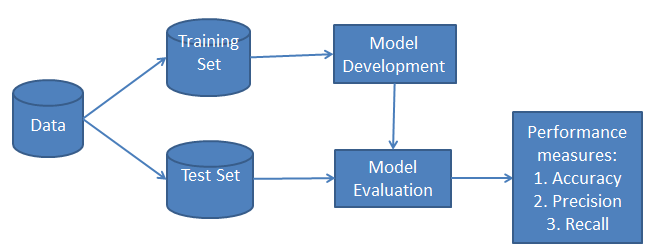

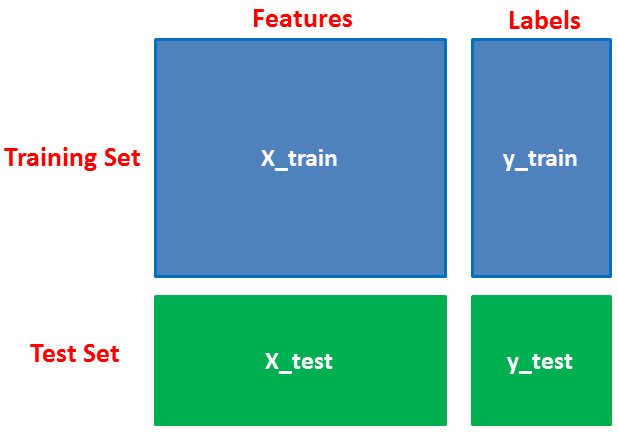

In [8]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

X = play_tennis[['outlook','temperature', 'humidity','windy']]
Y = play_tennis['play']


# แบ่งข้อมูลที่ใช้สำหรับการสอน training set 70% 
# ข้อมูลที่ใช้สำหรับการทดสอบ test set 30%
# random_state = 3 หมายถึงกำหนดเลขสุมขึ้นมาเพื่อให้ข้อมูล training และ test set มีสมาชิกตัวเดิม

# train_test_split(X,Y,test_size=0.3,random_state=5)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

print(len(X_train),len(X_test),len(y_train),len(y_test))

9 5 9 5


In [9]:
#Train the model using the training sets
# .fit(x-train,y-train)
Gaussian_NB.fit(X_train,y_train)
Bernoulli_NB.fit(X_train,y_train)
Multinomial_NB.fit(X_train,y_train)
Categorical_NB.fit(X_train,y_train)


#Predict the response for test dataset
Y_Predict_GNB = Gaussian_NB.predict(X_test)
Y_Predict_BNB = Bernoulli_NB.predict(X_test)
Y_Predict_MNB = Multinomial_NB.predict(X_test)
Y_Predict_CNB = Categorical_NB.predict(X_test)


print(Bernoulli_NB.score(X_train,y_train))
print(Bernoulli_NB.score(X_test,y_test))

0.8888888888888888
0.6


In [10]:
#Evaluating Model

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Gaussian Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Bernoulli Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Multinomial Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))
print("Categorical Accuracy:",metrics.accuracy_score(y_test, Y_Predict_GNB))

Gaussian Accuracy: 0.6
Bernoulli Accuracy: 0.6
Multinomial Accuracy: 0.6
Categorical Accuracy: 0.6


<img src="matrix.jpg" width="400" height="1000">

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, Y_Predict_BNB)
confusion_matrix

array([[1, 2],
       [0, 2]], dtype=int64)

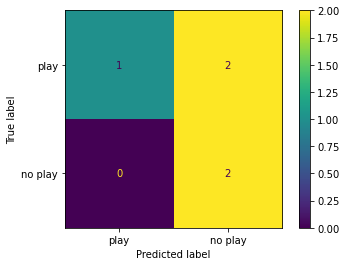

In [12]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['play', 'no play'])

cm_display.plot()
plt.show()

In [13]:
#Import Library of K-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

# predict(...)
Y_Predict_KNN =KNN_model.predict(X_test)
print("KNN Accuracy:",metrics.accuracy_score(y_test, Y_Predict_KNN))

KNN Accuracy: 0.4


In [14]:
#Predict new data ใช้ Bernoulli NB
# [[1,1,0,1],[2,2,1,0] ] # 1:rain, 1:hot, 0:high, 1:weak
predicted= Bernoulli_NB.predict([[1,1,0,1],[2,2,1,0] ])
print("Predicted Value:", predicted)

Predicted Value: ['yes' 'yes']


C:\Users\user\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [15]:
#Predict new data ใช้ Bernoulli NB
# [[0,0,0,1],[1,1,0,0],[2,2,0,1] ] # 1:rain, 1:hot, 0:high, 1:weak

predicted= Bernoulli_NB.predict([[0,0,0,1],[1,1,0,0],[2,2,0,1] ])
print("Predicted Value:", predicted)

Predicted Value: ['yes' 'no' 'yes']


C:\Users\user\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
